# Quick Lego Visuals

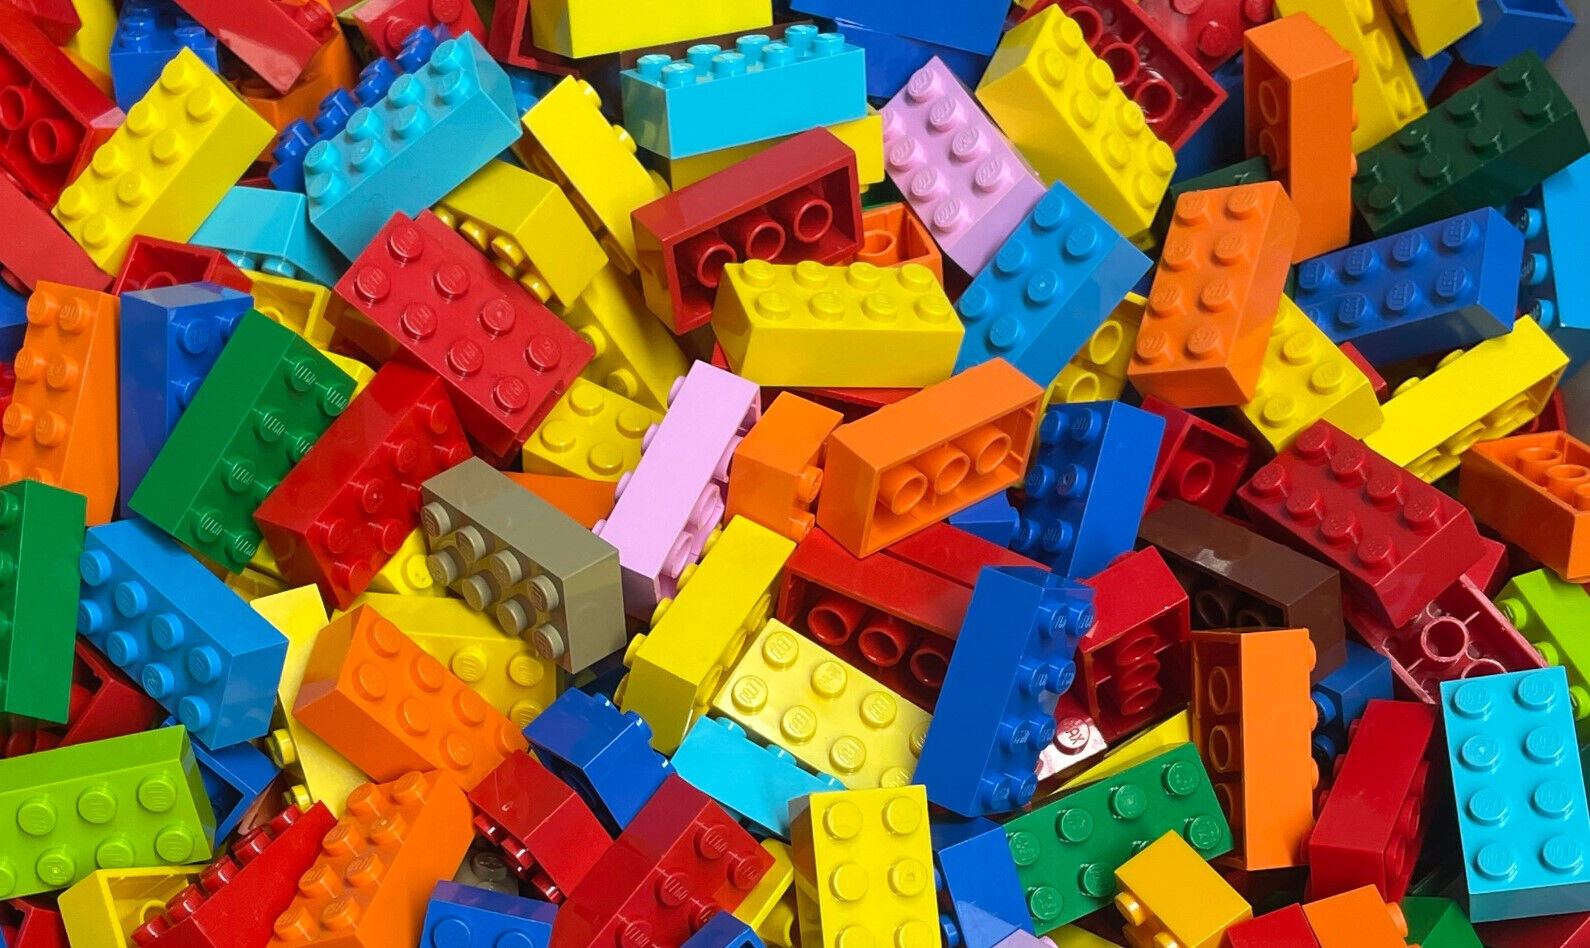

• Which year produced the most sets?
    - From the sets that produced the most sets, which theme was the most popular?/ Which set theme was created the most?
•Which theme had the most pieces per year?
•Which set from each theme had the most pieces?


Load in data

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sets =  pd.read_csv(r"C:\Users\sydne\Desktop\Springboard\legos\sets.csv")
themes =  pd.read_csv(r"C:\Users\sydne\Desktop\Springboard\legos\themes.csv")

## Lego Sets with a focus on Star wars, Harry potter and Batman

### let's get our desired sets, the sets with a theme name "Star Wars", "Harry Potter" or "Batman"

In [5]:
themes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         466 non-null    int64  
 1   name       466 non-null    object 
 2   parent_id  324 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 11.1+ KB


In [15]:
desired_theme=themes.loc[(themes['name']=='Star Wars') | (themes['name']=='Batman') | (themes['name']=='Harry Potter')]
desired_theme

,id,name,parent_id
5,18,Star Wars,1.0
74,158,Star Wars,NaN
95,209,Star Wars,207.0
115,246,Harry Potter,NaN
122,261,Star Wars,258.0
399,697,Batman,695.0
410,710,Harry Potter,207.0


### merge desired sets with sets

In [25]:
new_set = pd.merge(sets, desired_theme, how= 'left', left_on= 'theme_id', right_on= 'id', suffixes=('_set', '_theme'))
new_set.head()
desired_sets = new_set[new_set['theme_id']== new_set['id']]
desired_sets

,set_num,name_set,year,theme_id,num_parts,img_url,id,name_theme,parent_id
265,10132-1,Motorized Hogwarts Express,2004,246,713,https://cdn.rebrickable.com/media/sets/10132-1...,246.0,Harry Potter,NaN
350,10217-1,Diagon Alley,2011,246,2029,https://cdn.rebrickable.com/media/sets/10217-1...,246.0,Harry Potter,NaN
925,10937-1,Batman: Arkham Asylum Breakout,2012,697,1621,https://cdn.rebrickable.com/media/sets/10937-1...,697.0,Batman,695.0
2239,20006-1,Clone Turbo Tank,2008,158,64,https://cdn.rebrickable.com/media/sets/20006-1...,158.0,Star Wars,NaN
2250,20007-1,Republic Attack Cruiser,2009,158,84,https://cdn.rebrickable.com/media/sets/20007-1...,158.0,Star Wars,NaN
...,...,...,...,...,...,...,...,...,...
23817,VP-4,Star Wars Co-Pack,2000,158,0,https://cdn.rebrickable.com/media/sets/vp-4.jpg,158.0,Star Wars,NaN
23820,VP-8,Star Wars Co-Pack,2000,158,0,https://cdn.rebrickable.com/media/sets/vp-8.jpg,158.0,Star Wars,NaN
23855,XWING-1,Mini X-Wing Fighter,2019,158,60,https://cdn.rebrickable.com/media/sets/xwing-1...,158.0,Star Wars,NaN
23856,XWING-2,X-Wing Trench Run,2019,158,52,https://cdn.rebrickable.com/media/sets/xwing-2...,158.0,Star Wars,NaN


In [51]:
desired_sets['year'].min

<bound method Series.min of 265      2004
350      2011
925      2012
2239     2008
2250     2009
         ... 
23817    2000
23820    2000
23855    2019
23856    2019
23857    2013
Name: year, Length: 1269, dtype: int64>

## Given our themes/sets which year produced the most sets?

In [82]:
y = desired_sets['year'].value_counts()
year_count =  pd.DataFrame({'id' : y.index, 'year_count': y.values})


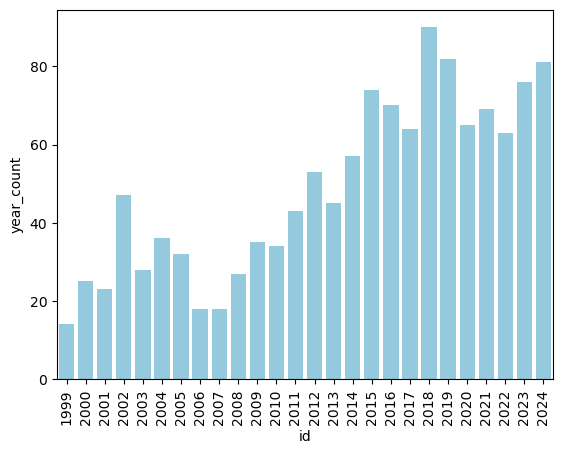

In [87]:
sns.barplot(data=year_count, x = 'id', y='year_count', color= 'skyblue')
plt.xticks(rotation = 90)
plt.show()

## From the graph above, 2018, 2019 and 2024 have produced the most sets under the themes supplied. Let's get a closer look and see which theme was most produced for these years

In [139]:
eightteen= desired_sets[desired_sets['year']==2018]

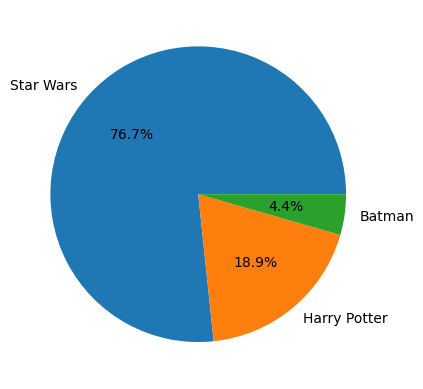

In [93]:
n = eightteen['name_theme'].value_counts()
n_count =  pd.DataFrame({'id' : n.index, 'theme_count': n.values})
plt.pie(n_count['theme_count'],labels= n_count['id'], autopct='%1.1f%%')
plt.show()

Alright, looking at the 2018 themes, we can see that Star War's takes up the majority with Batman taking up the least.

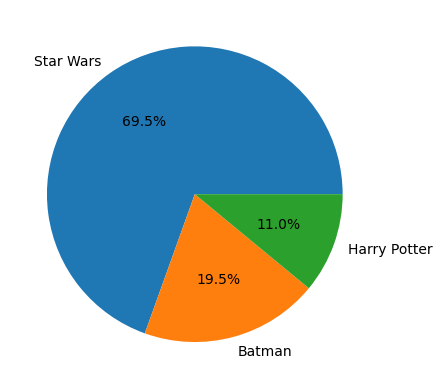

In [137]:
nineteen= desired_sets[desired_sets['year']==2019]
n2 = nineteen['name_theme'].value_counts()
n2_count =  pd.DataFrame({'id' : n2.index, 'theme_count': n2.values})
plt.pie(n2_count['theme_count'],labels= n2_count['id'], autopct='%1.1f%%')
plt.show()


Only a year later, we see that while Star Wars still takes up the most percentage, we can see that Batman sets creation has increased roughly 15.1%. and Harry Potter's set creation has declined about 7.9%. Star Wars too has taken a decline of 7.2%  

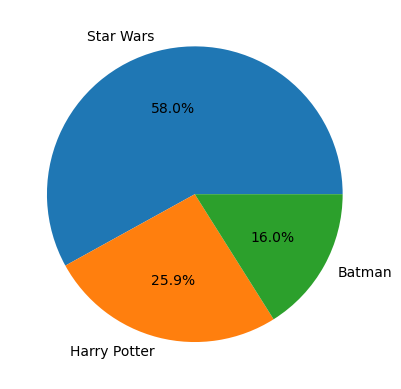

In [135]:
twentyfour= desired_sets[desired_sets['year']==2024]
n3 = twentyfour['name_theme'].value_counts()
n3_count =  pd.DataFrame({'id' : n3.index, 'theme_count': n3.values})
plt.pie(n3_count['theme_count'],labels= n3_count['id'], autopct='%1.1f%%')
plt.show()

In present time, we see that Star wars still holds the majority, but is still in decline in terms of sets being created. Harry potter sets have taken another increase and Batman has declined slightly.

## Which theme has the most pieces per year?
 

#### Given what we've seen in terms of proportion, Star Wars overwhelms the other two themes, could it be the same for the amount of pieces? 

c:\Users\sydne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sydne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sydne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sydne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Axes: xlabel='year', ylabel='num_parts'>

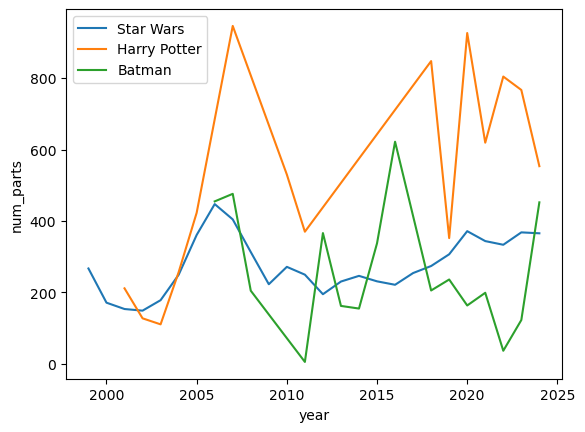

In [138]:
sw = desired_sets[desired_sets['name_theme']== 'Star Wars']
#print(sw.head())
hp = desired_sets[desired_sets['name_theme']== 'Harry Potter']
bm =desired_sets[desired_sets['name_theme']== 'Batman']
sns.lineplot(data = sw, x = 'year', y = 'num_parts', errorbar= None, label= "Star Wars")
sns.lineplot(data = hp, x = 'year', y = 'num_parts', errorbar= None, label = 'Harry Potter')
sns.lineplot(data = bm, x = 'year', y = 'num_parts', errorbar= None, label = "Batman")


This graph is rather ugly, but it looks like the theme Harry Potter has the most pieces almost every year, except when the sets first started coming out, Batman's pieces flucuate every 5 years or so    

Let's see if we can view this data in another way, something more easy on the eyes, let's try a bar graph

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, '1999'),
  Text(1, 0, '2000'),
  Text(2, 0, '2001'),
  Text(3, 0, '2002'),
  Text(4, 0, '2003'),
  Text(5, 0, '2004'),
  Text(6, 0, '2005'),
  Text(7, 0, '2006'),
  Text(8, 0, '2007'),
  Text(9, 0, '2008'),
  Text(10, 0, '2009'),
  Text(11, 0, '2010'),
  Text(12, 0, '2011'),
  Text(13, 0, '2012'),
  Text(14, 0, '2013'),
  Text(15, 0, '2014'),
  Text(16, 0, '2015'),
  Text(17, 0, '2016'),
  Text(18, 0, '2017'),
  Text(19, 0, '2018'),
  Text(20, 0, '2019'),
  Text(21, 0, '2020'),
  Text(22, 0, '2021'),
  Text(23, 0, '2022'),
  Text(24, 0, '2023'),
  Text(25, 0, '2024')])

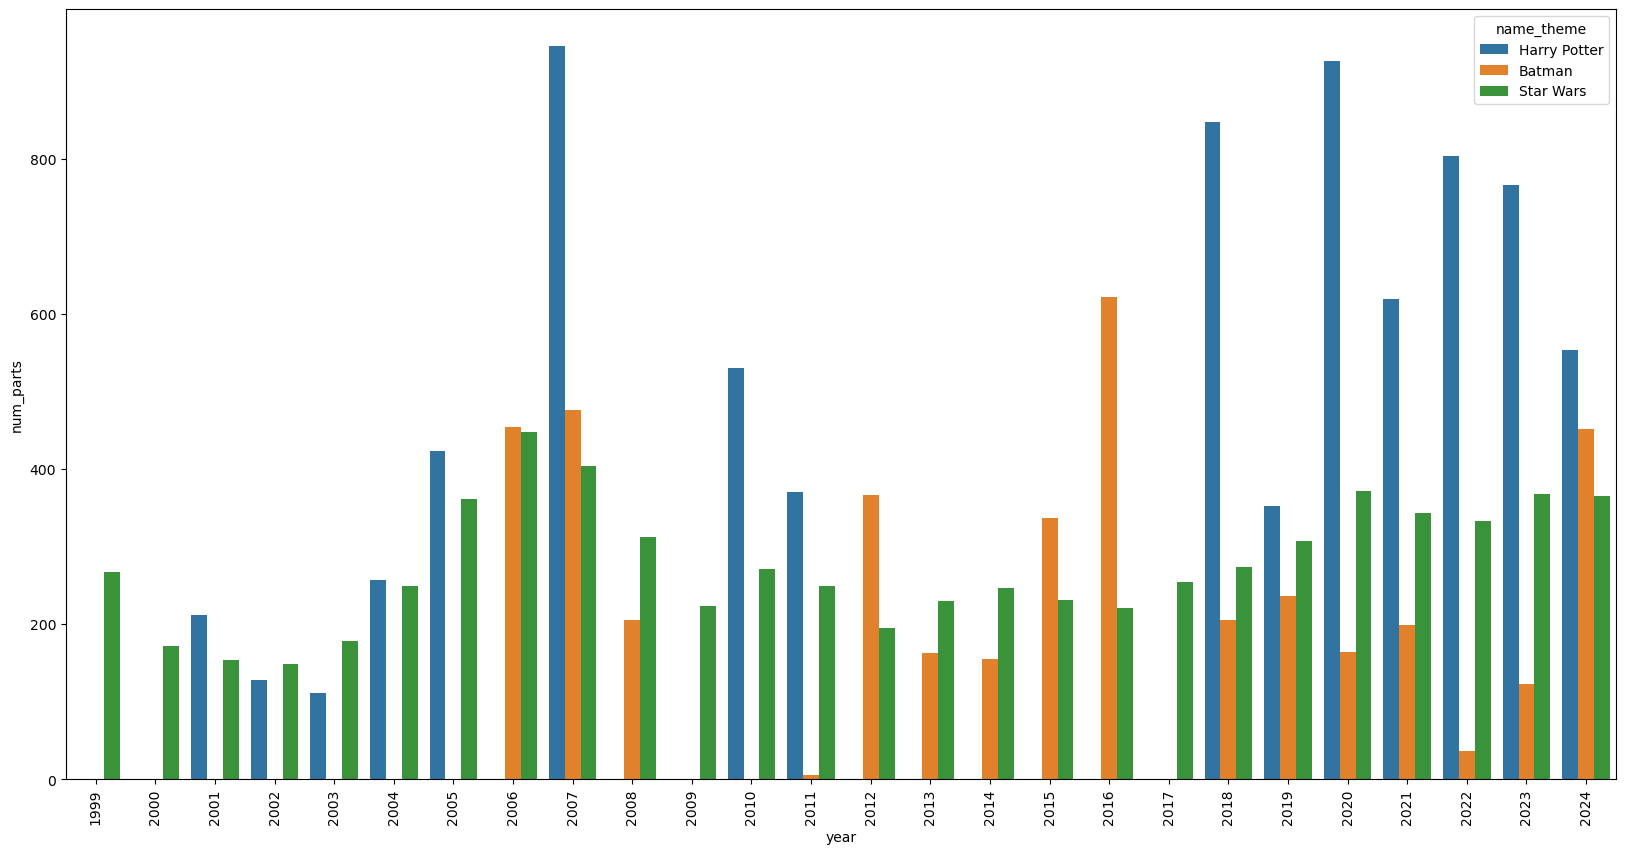

In [140]:
plt.figure(figsize=(20,10))
sns.barplot(desired_sets, x = 'year', y = 'num_parts', hue ='name_theme', errorbar=None)
plt.xticks(rotation = 90)

This is way easier to look at! It's confirmed that Harry potter sets typically have more pieces compared to the other two themes.

## Finally, Which set per theme has the most amount of pieces?

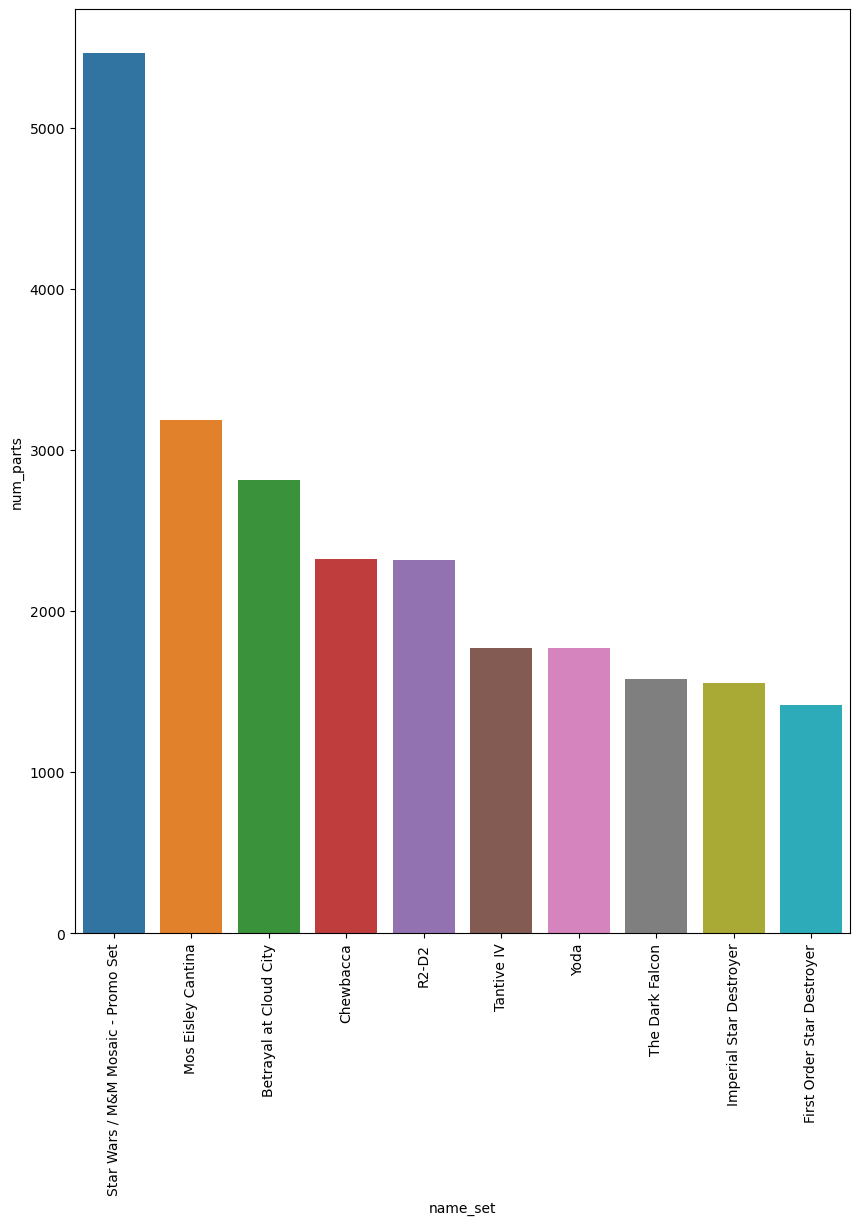

In [155]:
sw = sw.sort_values('num_parts', ascending=False).head(10)
plt.figure(figsize=(10,12))
sns.barplot(data= sw,x = 'name_set', y = 'num_parts', errorbar = None)
plt.xticks(rotation =90)
plt.show()


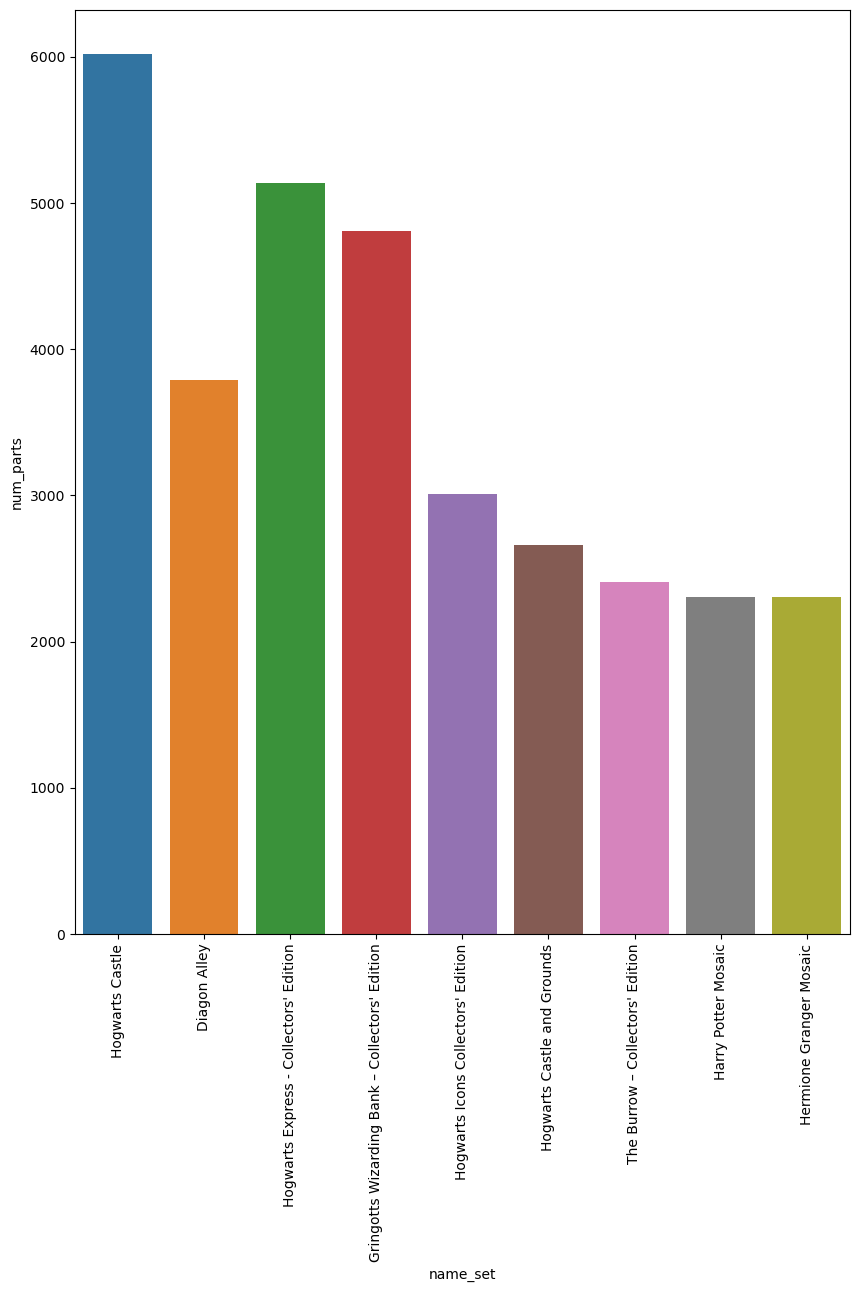

In [156]:
hp = hp.sort_values('num_parts', ascending=False).head(10)
plt.figure(figsize=(10,12))
sns.barplot(data= hp,x = 'name_set', y = 'num_parts', errorbar = None)
plt.xticks(rotation =90)
plt.show()

Wow! Harry Potter's Hogwarts Castle set is roughly 6,000 pieces, and the Hogwarts Express is roughly the same amount of pieces to Star War's M&M mosaic set, around 5,000 pieces. 

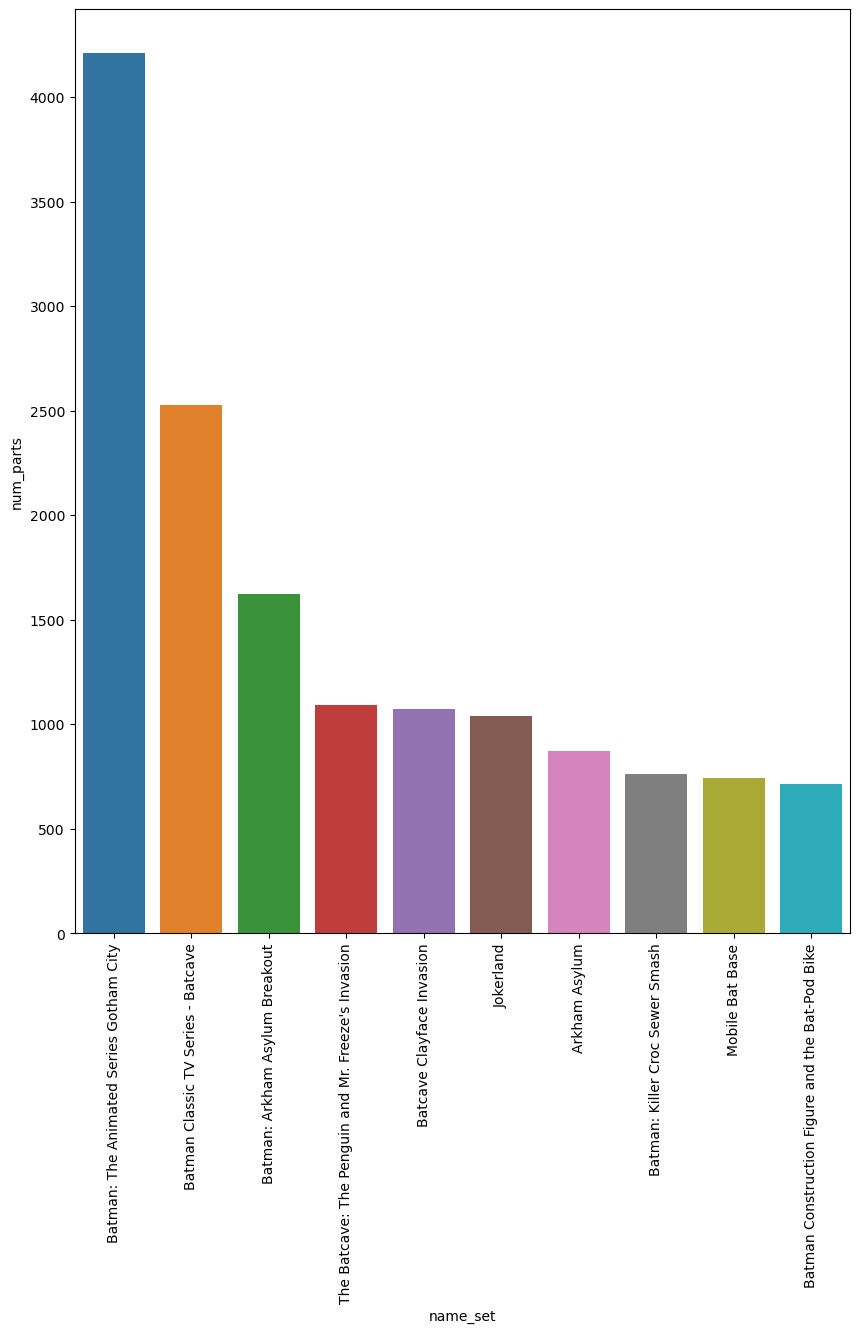

In [157]:
bm= bm.sort_values('num_parts', ascending=False).head(10)
plt.figure(figsize=(10,12))
sns.barplot(data= bm,x = 'name_set', y = 'num_parts', errorbar = None)
plt.xticks(rotation =90)
plt.show()

Alright, so the Batman set with the most pieces, somewhere above 4,000 pieces, still has almost a full thousand less than Star Wars and almost 2 thousand less than Harry Potter. It also appears that top Batman sets, from the given themes, is the only one to have sets that have less than 1000 pieces.

To conlude, from 1999 to 2024, the years that craeted the most sets in regards to Harry Potter, Star Wars and Batman was 2018, 2019, and 2024. From those years, it was apparent that Star Wars sets dominated, despite declining slightly, but still held on to over 50% in set creation. When observing the actual piece amount per year, Harry potter typically had the most pieces, with Star Wars coming in second and Batman coming in third. When looking at individual sets, these sets were the top ten in terms of pieces, Harry Potter's Hogwarts Castle had a whopping 6,000 pieces, Star War's/M&M mosaic promo had over 5,000 pieces and Batman's Gotham City set had just above 4,000 pieces. Mind you all of those sets have an insane amount of pieces, but it is clear that despite star wars sets being around longer and having more sets by comparison, Harry Potter sets do have more pieces.   